# Welcome to Week 6!
This week, you will review key concepts of decision trees and random forests. You will also expand your prior knowledge by learning how decision trees use entropy and information gain to split data, the risks of overfitting, and strategies to control complexity. You will also explore how random forests improve model performance through feature randomization.

## Learning Objectives
At the end of this week, you should be able to: 
- Explain the structure and purpose of decision trees in classification and regression tasks. 
- Compute entropy and information gain to evaluate and select optimal feature splits.  
- Identify and explain the risk of overfitting in decision trees and its implications. 
- Evaluate and apply common techniques to prevent overfitting in decision trees. 
- Explain how random forests can improve on decision trees to prevent overfitting. 
- Adjust hyperparameters for random forests to prevent overfitting. 
- Calculate feature importances in random forests. 

## 6.1 Lesson: Decision Trees
A **decision tree** makes judgments about data samples via a sequence of decisions. 

For example: 
- Suppose we are classifying apples based on their diameter and mass and trying to estimate their price. 
- We might make a tree such that the first decision asks whether diameter > 7 cm. If diameter is > 7 cm, we make a second choice: is mass > 80 grams? 
- On the other hand, if diameter is < 7 cm, we make a different second choice. This could actually be the same again (is mass > 80 grams?). Or it could be a different choice about mass, or it could be about diameter again (is diameter > 9 cm?). 

After making all of these choices, we come to a leaf node — that is, we come to a case where we have no further choices to make. At that point, we either classify the sample (the apple is good or bad), or we assign it a numerical value (the apples will cost $0.50). 

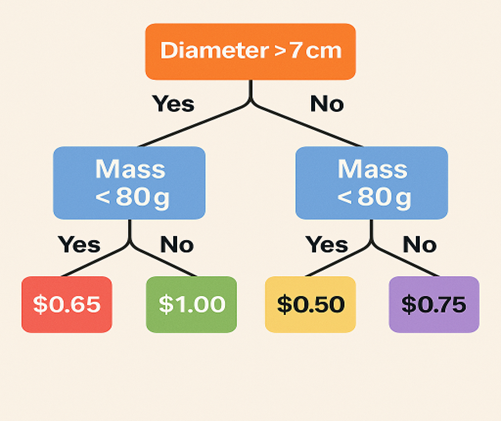

### Entropy and Information Gain
From our previous example, how do we choose which feature to use for each choice? We use ideas called entropy and information gain. This is easiest to illustrate in the classification case; we just want to say if the apple is good or bad. 

The, the **entropy** at a given node is the sum of:

$$ -p\ln(p)\$$

where $p$'s are the probabilities of "good" and "bad" at each node. 

So, the **entropy** would be::

$$-p_{good} \ln(p_{good}) - p_{bad}\ln(p_{bad})$$

Entropy can be thought of as “how much information is missing?” Thus, if there is an unknown bit (we don’t know how a 50/50 coin will flip), then the entropy is:

$$-0.5\ln(0.5) - 0.5 \ln(0.5)$$

if we choose to be in base $e$. If we choose to be in base 2, then we use base two logarithms instead. 

**Information Gain** involves computing the probability of each branch exiting that node. 

If the branches are $A$ and $B$, then we must compute 

$$ -p_A \times \text{entropy}_A - p_B \times \text{entropy}_B $$

This estimates the entropy that will remain after we make the decision. 

We want to minimize this entropy, which is to say, we want the nodes at the end of each branch to be relatively “pure.” 

The **information gain** is defined as:

$$ \text{entropy}_{parent} - p_A \times \text{entropy}_A - p_B \times \text{entropy}_B $$

which should be maximized, because a greater reduction in entropy corresponds to more information after the split. (We can conceptualize entropy as a lack of information.)

If there are 10 good and 10 bad apples at the parent node, 10 of which go to branch $A$ and 10 of which go to branch $B$, then it’s good if all 10 good apples go to $A$ and all 10 bad apples go to $B$. 

Then the two child nodes would be “pure,” and the information gain would be high. With this one decision, we can classify all apples with 100% accuracy. 

On the other hand, it’s bad if 5 good apples go to each side, as do 5 bad apples — then both sides would have high entropy. 

In this case, we’ve basically learned nothing about the apples with this decision. It is, however, possible that this decision was a necessary step anyway. 

For instance: 

If what matters is only the interaction, then diameter and mass alone might not provide enough information. 

This would happen if high diameter and high mass go to $A$, as do low diameter and low mass; but high diameter and low mass go to $B$, as do low diameter and high mass.

### Overfitting in Decision Trees
Decision trees can easily overfit. 

For example, Imagine a simple case where diameter is all that matters:
- There are 4 apples. 
    - Those with diameters of 5 cm and 8 cm are good; those with diameters of 6 cm and 7 cm are bad. 
    - Then, we could construct a tree that classifies apples with less than 5.5 cm or more than 7.5 cm diameter as good, but it’s not clear that this is meaningful. 
    - It seems more likely that it’s more random than that, and the next four apples would behave totally differently. 

As another example, imagine you're building a model to predict whether customers will cancel their subscription based on their behavior (e.g. login frequency, number of support tickets, and time spent on the platform): 
- If you use a very deep tree (a tree with many layers), the model might learn overly specific patterns — like "customers who log in exactly 7 times and submit 2 tickets in 3 days will cancel" — which may only apply to your current dataset. This is **overfitting:** great performance on training data, but poor generalization to new customers. 
- If you instead use a very shallow tree, the model might only learn simple rules like "customers with fewer than 3 logins cancel," missing more complex but meaningful behavior patterns. This is **underfitting**, where the model is too simple to capture useful insights — even from the training data itself. 

To avoid **overfitting**, we might try any of the following:

**Max depth:** We might stop the tree after a certain number of decisions (depth). This would prevent us from focusing on minor differences that only relate to a small number of samples. 

**Min samples per leaf:** We might stop making decisions when our leaf node contains a certain minimum number of samples. After that, we stop splitting. 

**Min samples per split:** We might stop making decisions when our parent node contains a certain minimum number of samples. After that, we stop splitting. This is a bit different from having a minimum number of samples per leaf because this could give us a leaf with (let’s say) only one sample, while min samples per leaf could not do that.

### Think About It
- Why is there a minus sign in the definition of entropy? (The sum of $-p \ln(p)$ using $p_{good}$ and $p_{bad}$ for a given node.) 
- If there are 1,024 samples, how many nodes are needed in the decision tree if each leaf is to contain one sample? 
- If there are 1,024 samples, how many decisions need to be made to get from the root (initial state where all samples are included) to a single leaf node with one sample? 





## 6.2 Lesson: Random Forests
**Random forests** use decision trees, but they make better decisions. 
- Decision trees are prone to overfitting because they can exactly fit the training data if they end up with one sample per leaf node. 
- **Random forests** use **bagging** or **bootstrap** aggregating instead. This means that they build multiple trees, each of which has slightly different features. 

### Feature Randomization
At each split in a given tree, a random subset of features is selected. 
- Thus, if the possible features are $A$, $B$, $C$, and $D$, then the first split might arbitrarily allow $B$ and $C$ only, while the second layer of splits has one with $A$ and $C$ and another with $B$ and $D$. 
- Only the selected features can be used for that split. This prevents every tree from being the same, which would lead to overfitting, as with decision trees. 

### Random Forest Decisions: Classification or Regression
By combining the judgments of the different trees, the random forest comes to its decisions. 
- With classification, the random forest would select the most common class among the trees for that leaf node (i.e. sample). 
- With regression, it would select the average of the judgments of the trees for that leaf node. 

### Feature Importances
**Random forests** are not as intelligible as decision trees — that is, we cannot draw a picture of the decision trees. There are too many of them. 
- However, **random forests** can keep track of feature importances. In other words, it can recall how often each feature was used for a split. 

### Think About It
- Why does random forest randomize features? 
- Why does random forest combine the judgments of multiple trees? 


In this example, $Z$ = the likelihood of a biking accident, $Y$ = speed, and $X$ = trail difficulty. We assume that $X$ decreases $Y$ causally because people decrease their speed on difficult trails. 

In addition, $Y$ and $X$ both increase $Z$ causally because fast biking on difficult trails leads to accidents. 

Difficulty will be on a scale from 0 to 1, speed in miles per hour, and likelihood of an accident also on a scale from 0 to 1. (Based on the numbers, I'd say these trails are quite challenging!)

In [2]:
import numpy as np
import pandas as pd

num = 100
difficulty = np.random.uniform(0, 1, (num,)) 
speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0) 
accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1) 
df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident})
df.head()

,difficulty,speed,accident
0,0.581827,8.927326,0.917845
1,0.124778,21.521093,0.527339
2,0.431322,10.188946,0.844922
3,0.586610,6.306511,0.293698
4,0.359144,12.842835,0.990645


In [3]:
X = difficulty
Y = speed
Z = accident

In [4]:
import statsmodels.api as sm
model = sm.OLS(Z, sm.add_constant(np.column_stack((X, Y))))
results = model.fit()

Use ﻿X﻿ to predict ﻿Y﻿ many times via regression with different data sets. Use many samples in each prediction. Which is closest to the average coefficient of ﻿X﻿ if you do the experiment enough times? 

Average coefficient after 1000 experiments: -9.7188


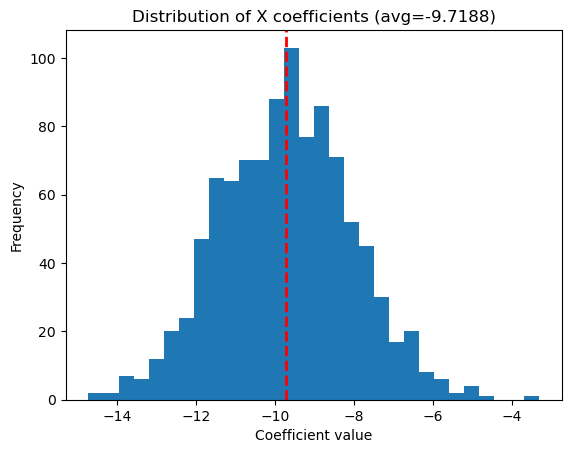

In [5]:
from sklearn.linear_model import LinearRegression

# Simulate multiple regressions with different datasets
import matplotlib.pyplot as plt

num_experiments = 1000
coefficients = []

for i in range(num_experiments):
    # Generate new random data using the same process
    new_difficulty = np.random.uniform(0, 1, (num,))
    new_speed = np.maximum(np.random.normal(15, 5, (num,)) - new_difficulty * 10, 0)
    
    # Reshape for sklearn
    X_reshaped = new_difficulty.reshape(-1, 1)
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X_reshaped, new_speed)
    
    # Store coefficient
    coefficients.append(model.coef_[0])

# Calculate average coefficient
avg_coef = np.mean(coefficients)
print(f"Average coefficient after {num_experiments} experiments: {avg_coef:.4f}")

# Plot histogram of coefficients
plt.hist(coefficients, bins=30)
plt.axvline(avg_coef, color='r', linestyle='dashed', linewidth=2)
plt.title(f'Distribution of X coefficients (avg={avg_coef:.4f})')
plt.xlabel('Coefficient value')
plt.ylabel('Frequency')
plt.show()

In [6]:
coefficients_XZ = []

for _ in range(num_experiments):
    # Generate new random data
    new_difficulty = np.random.uniform(0, 1, (num,))
    new_speed = np.maximum(np.random.normal(15, 5, (num,)) - new_difficulty * 10, 0)
    new_accident = np.minimum(np.maximum(0.03 * new_speed + 0.4 * new_difficulty + np.random.normal(0, 0.3, (num,)), 0), 1)
    
    # Prepare features and target
    X_features = np.column_stack((new_difficulty, new_accident))
    y_target = new_speed
    
    # Fit regression
    model = LinearRegression()
    model.fit(X_features, y_target)
    coefficients_XZ.append(model.coef_[0])  # Coefficient for X

avg_coef_XZ = np.mean(coefficients_XZ)
print(f"Average coefficient for X when using X and Z to predict Y: {avg_coef_XZ:.4f}")

Average coefficient for X when using X and Z to predict Y: -10.3916
